In [82]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [83]:
### Taken from https://flynn.gg/blog/better-matplotlib-charts/
def number_formatter(number, pos=None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000.0
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])
#ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))

In [84]:
colors = dict(zip(['60%','70%','80%','90%'],['#1b9e77','#d95f02','#7570b3','#e7298a']))
markers = dict(zip(['30d','45d','60d'],['o','^','s']))

In [85]:
loss = pd.read_csv('../loss_over_time.csv',parse_dates=['date'])
loss['loss']*=10**6
loss['label'] = loss['intervention'].apply(lambda x: '{}%,{}d'.format(x.split('_')[-2],x.split('_')[-1]) if x!='none' else 'base')
loss['day'] = (loss['date'] - loss['date'].min()).dt.days
loss = loss.pivot(index='day',columns='label',values='loss').fillna(0)
#loss=loss.resample('W').sum()

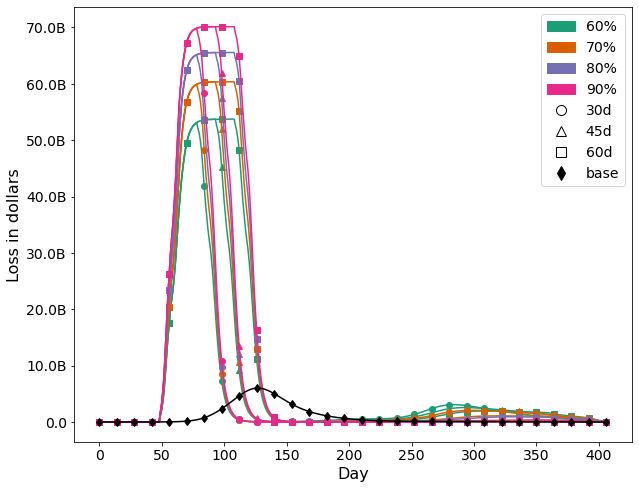

In [86]:
f = plt.figure(figsize=(10,8))
ax = plt.gca()
for x in loss.columns:
    if x!='base':
        loss[x].plot(ax=ax,marker=markers[x.split(',')[1]],markersize=6,color=colors[x.split(',')[0]],markevery=14)
    else:
        loss[x].plot(ax=ax,marker='d',markersize=6,color='k',markevery=14)

plt.tick_params(labelsize=14)
ax.yaxis.set_major_formatter(FuncFormatter(number_formatter))
plt.xlabel('Day',fontsize=16)
plt.ylabel('Loss in dollars',fontsize=16)
plt.legend(handles=[mpatches.Patch(color=colors[k],label=k) for k in colors.keys()] + 
                   [mlines.Line2D([], [], color='k',marker=markers[k],linestyle='None',markersize=10,markerfacecolor='none',label=k) for k in markers.keys()] +
                   [mlines.Line2D([],[],color='k',marker='d',linestyle='None',markersize=10,label='base')],fontsize=14)
plt.savefig('../../fig/compare_ts_by_npi.png',bbox_inches='tight',dpi=100)